# Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE
import itertools

%matplotlib inline
matplotlib.style.use('ggplot')

Using TensorFlow backend.


# Loading the dataset

In [2]:
df = pd.read_csv('SalesKaggle3.csv')

In [8]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


# Data Info and Description for Data Overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


### Observation
- 198,917 Rows, 14 Columns
- Sold Flag and Sold Count has null values - to be predicted/scored

In [12]:
df.describe(include = 'all')

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [14]:
for col in df.columns:
    print("-------{}---------".format(col))
    print(df[col].value_counts())
    print('-----------')

-------Order---------
2047      1
15789     1
151011    1
148962    1
155105    1
         ..
123625    1
125672    1
103143    1
105190    1
2049      1
Name: Order, Length: 198917, dtype: int64
-----------
-------File_Type---------
Active        122921
Historical     75996
Name: File_Type, dtype: int64
-----------
-------SKU_number---------
2363390    2
631854     2
1519022    2
775601     2
621621     2
          ..
293832     1
551882     1
3730421    1
2534410    1
264193     1
Name: SKU_number, Length: 133360, dtype: int64
-----------
-------SoldFlag---------
0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64
-----------
-------SoldCount---------
0.0     63000
1.0      8179
2.0      2545
3.0      1018
4.0       483
5.0       253
6.0       149
7.0       121
8.0        62
9.0        32
10.0       30
12.0       28
11.0       21
14.0       11
13.0       10
16.0        9
15.0        6
18.0        5
19.0        4
22.0        4
27.0        3
17.0        3
26.0        3
24.0        2

### Observations

- Historical Sales Data Size : 75,996
- Active Inventory Data Size : 1,22,921 

In [16]:
historical_sales = df[df['File_Type'] == 'Historical']
active_sales = df[df['File_Type'] == 'Active']

# Data Visulaization
-----
## Part 1 : Categorical Data Distributions

### 1.1 File Type Distribution Plot

In [26]:
df['File_Type'].value_counts()

Active        122921
Historical     75996
Name: File_Type, dtype: int64

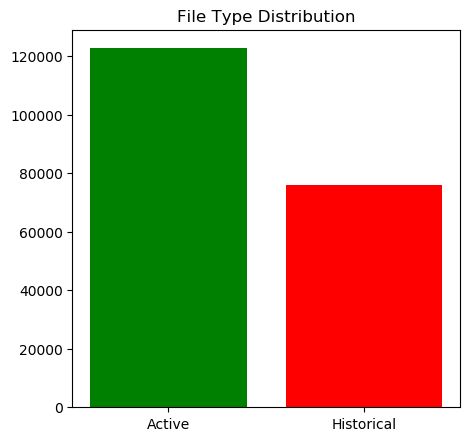

In [25]:
plt.figure(figsize = (5,5) , dpi = 100)
plt.title("File Type Distribution")
plt.bar(df['File_Type'].value_counts().index , df['File_Type'].value_counts().values , color = ['g','r'])
plt.show()

### Marketing Type Distribution

In [27]:
df['MarketingType'].value_counts()

S    100946
D     97971
Name: MarketingType, dtype: int64

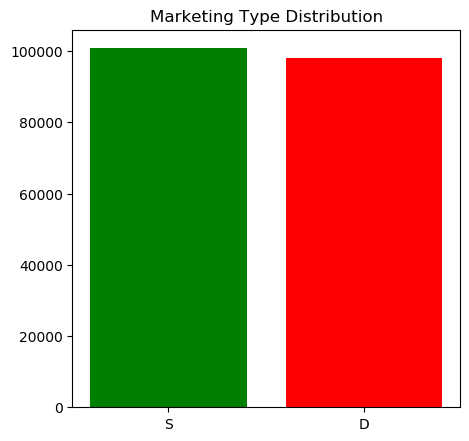

In [39]:
plt.figure(figsize = (5,5) , dpi = 100)
plt.title("Marketing Type Distribution")
plt.bar(df['MarketingType'].value_counts().index , df['MarketingType'].value_counts().values , color = ['g','r'])
plt.show()

### New Releases Distribution

In [35]:
df['New_Release_Flag'] = df['New_Release_Flag'].replace({0:'No' , 1:'Yes'})

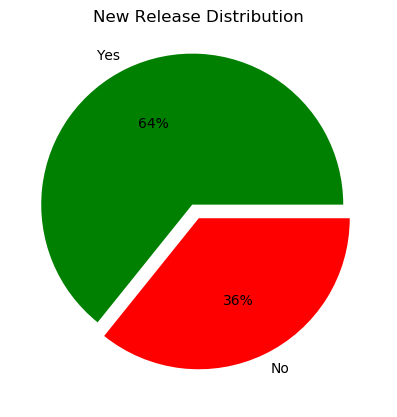

In [47]:
plt.figure(figsize = (5,5) , dpi = 100)
plt.title("New Release Distribution")
plt.pie( df['New_Release_Flag'].value_counts().values,labels = df['New_Release_Flag'].value_counts().index,
        explode=(0.1,0), autopct='%1.0f%%'  , colors = ['g','r'])
plt.show()

## Part 2 : Numerical Data Distributions for Historical Sales Data

### 2.1 Strength Factor ,PriceReg, Release Year, Item Count, Low User Price, Low Net Price

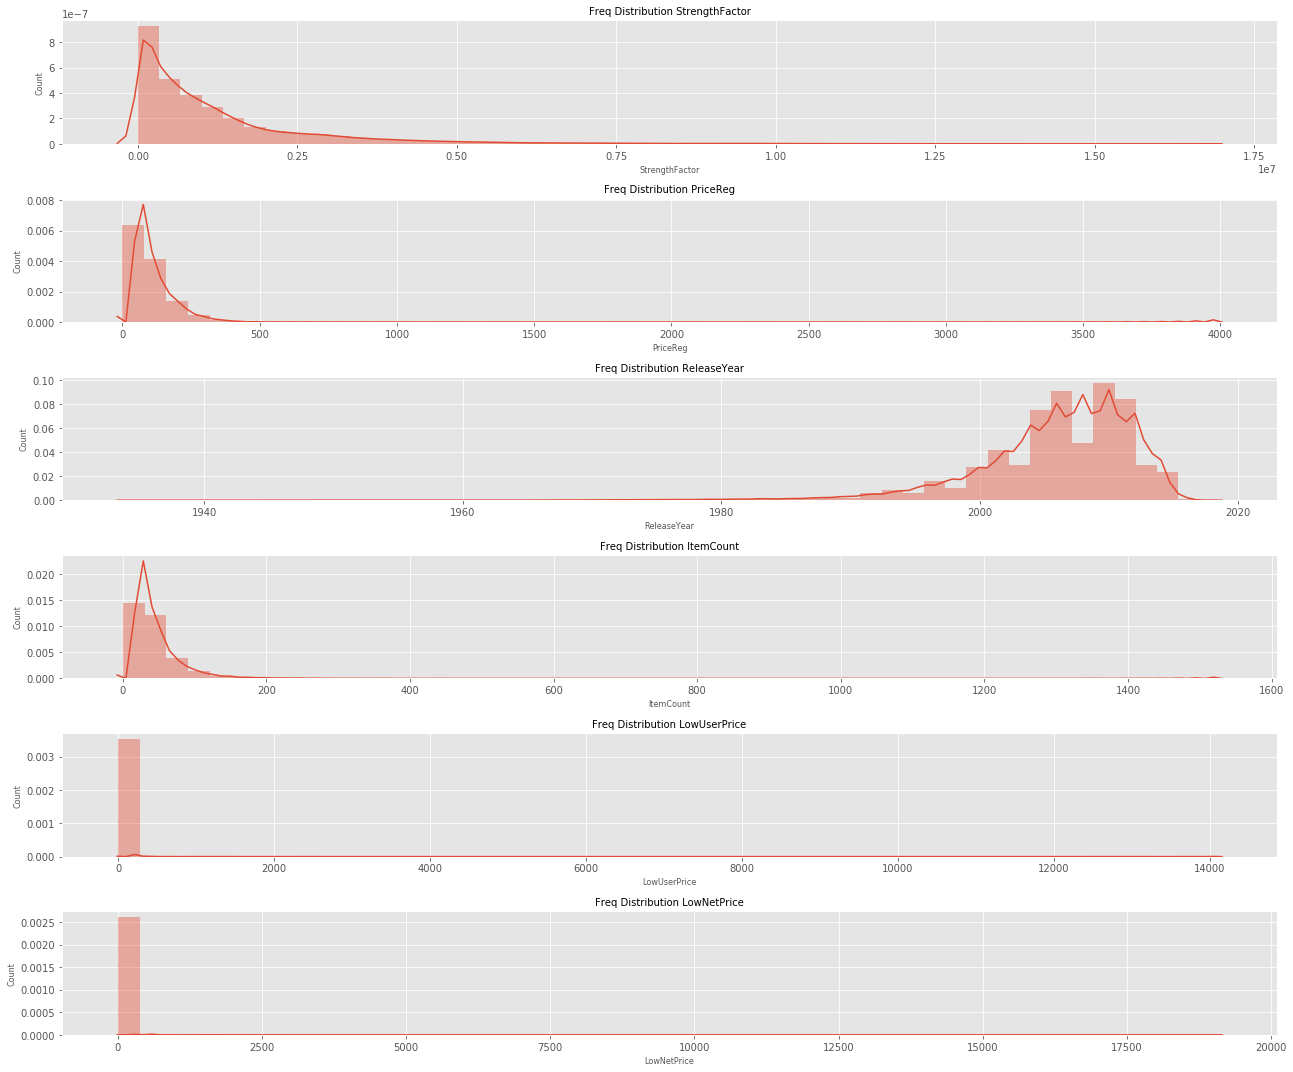

In [55]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(18,15))

for i, col_val in enumerate(col_names):
        
    sns.distplot(historical_sales[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency Distribution '+ col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
plt.tight_layout()
plt.show()

### Outlier Check in Numerical Data using Boxplot

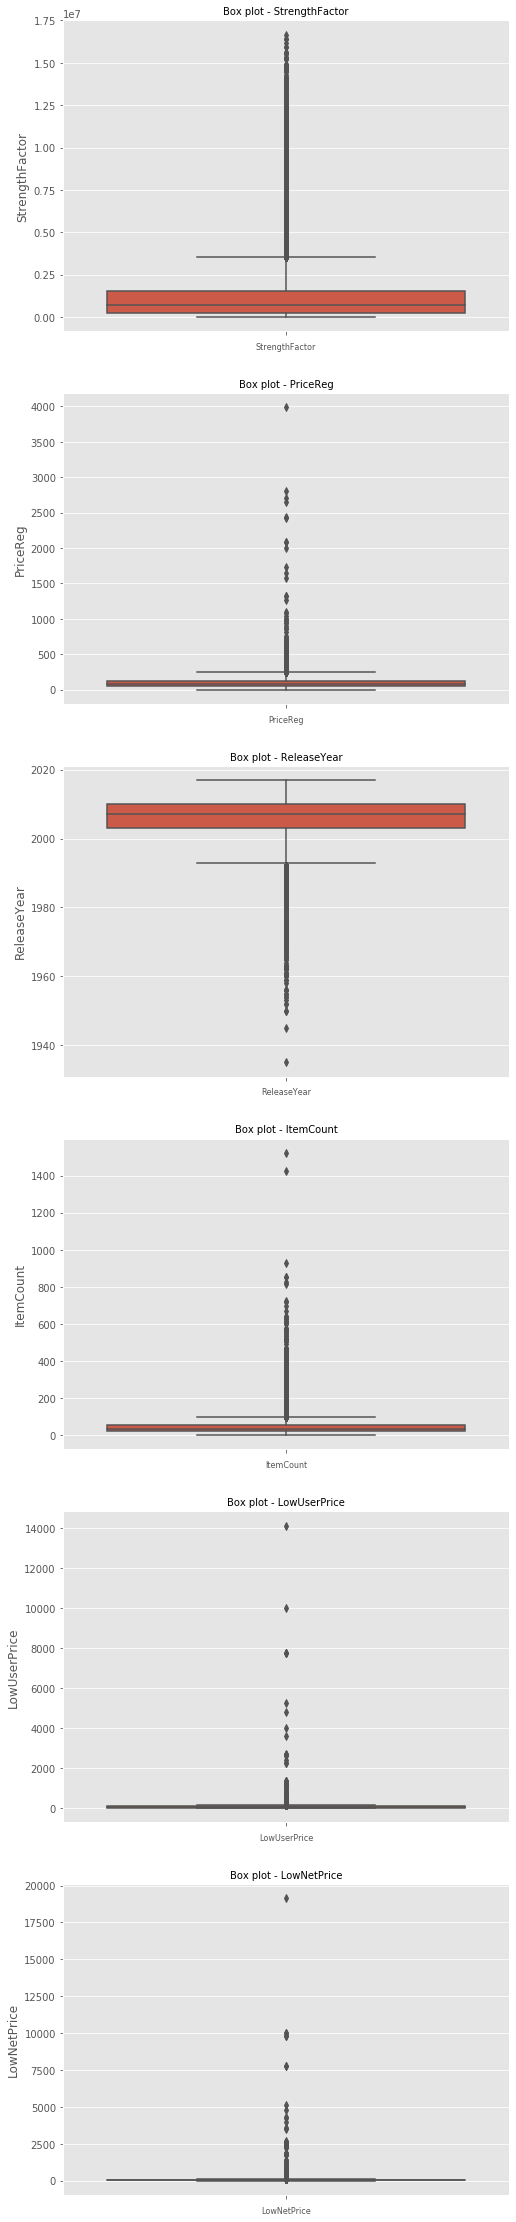

In [56]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=historical_sales[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

# Categorical Data Transformation 

- Since machine learning models require numerical input as features, we convert categorical data into numerical data

In [79]:
df['MarketingType'] = df['MarketingType'].astype('category')
df['MarketingType'] = df['MarketingType'].cat.codes
df['New_Release_Flag'] = df['New_Release_Flag'].replace({'No':0 , 'Yes':1})

### Separating Independent and Dependent Variables, with removal of features that are not required

In [80]:
independent_features = ['ItemCount','LowNetPrice','LowUserPrice','MarketingType','New_Release_Flag','PriceReg','ReleaseYear','StrengthFactor']
dependent_features = ['SoldFlag']
remove_cols = ['Order', 'File_Type', 'SKU_number', 'SoldCount', 'ReleaseNumber', 'SoldFlag']

In [81]:
historical_sales = df[df['File_Type'] == 'Historical']
active_sales = df[df['File_Type'] == 'Active']
y = historical_sales[dependent_features] # dependent feature

historical_sales = historical_sales.drop(remove_cols, axis=1)
active_sales = active_sales.drop(remove_cols, axis=1)

# Creating Training and Testing Data for the model with historical Sales

In [99]:
X_train,X_test,y_train,y_test = train_test_split(historical_sales, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60796, 8) (15200, 8)
(60796,) (15200,)


## Random Forest Classifier

In [100]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train, y_train )

RandomForestClassifier(n_estimators=25, random_state=12)

In [103]:
print('Validation Results')
print(clf_rf.score(X_train, y_train))
print(recall_score(y_train, clf_rf.predict(X_train)))

pred = clf_rf.predict(X_test)

print('\nTest Results')
print(clf_rf.score(X_test, y_test))
print(recall_score(y_test, pred))



Validation Results
0.9976149746693861
0.9861231569817867

Test Results
0.8277631578947369
0.1607483772432226


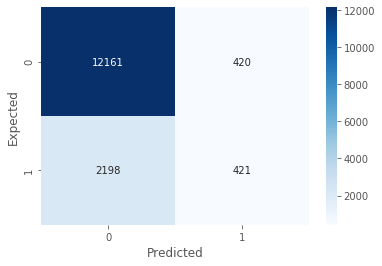

In [104]:
cnf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


## Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
print('Validation Results')
print(dtc.score(X_train, y_train))
print(recall_score(y_train, dtc.predict(X_train)))

pred = dtc.predict(X_test)

print('\nTest Results')
print(dtc.score(X_test, y_test))
print(recall_score(y_test, pred))



Validation Results
1.0
1.0

Test Results
0.7456578947368421
0.2936235204276441


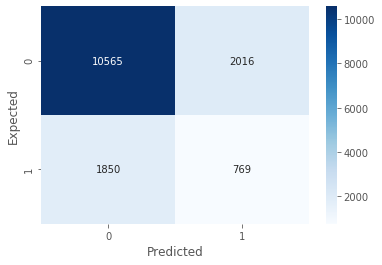

In [108]:
cnf_matrix = confusion_matrix(y_test, pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()